# ****📂 List Files in Root Dataset Directory****

In [1]:
import os

base_path = "/kaggle/input/brats20-dataset-training-validation"
print(os.listdir(base_path))


['BraTS2020_ValidationData', 'BraTS2020_TrainingData']


# ****🧰 Import Required Libraries for Medical Image Processing & Visualization****

In [2]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2


In [3]:
# Set path to one patient folder
path = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001"


# ****📁 List Patient Folders in BraTS2020 Training Data Directory****

In [4]:
import os

base_path = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData"
print(os.listdir(base_path))



['MICCAI_BraTS2020_TrainingData']


# ****🧬 Load and Display All Patient Folder Names from BraTS 2020 Dataset****

In [5]:
base_path = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
patient_folders = os.listdir(base_path)
print("Available Patients:", patient_folders[:368])  # Show all instead of first 5


Available Patients: ['BraTS20_Training_083', 'BraTS20_Training_337', 'BraTS20_Training_161', 'BraTS20_Training_198', 'BraTS20_Training_284', 'BraTS20_Training_169', 'BraTS20_Training_157', 'BraTS20_Training_073', 'BraTS20_Training_253', 'BraTS20_Training_026', 'BraTS20_Training_100', 'BraTS20_Training_107', 'BraTS20_Training_245', 'BraTS20_Training_358', 'BraTS20_Training_310', 'BraTS20_Training_205', 'BraTS20_Training_225', 'BraTS20_Training_320', 'BraTS20_Training_162', 'BraTS20_Training_108', 'BraTS20_Training_048', 'BraTS20_Training_218', 'BraTS20_Training_289', 'BraTS20_Training_045', 'BraTS20_Training_334', 'BraTS20_Training_054', 'BraTS20_Training_354', 'BraTS20_Training_243', 'BraTS20_Training_142', 'BraTS20_Training_179', 'BraTS20_Training_307', 'BraTS20_Training_070', 'BraTS20_Training_238', 'BraTS20_Training_146', 'BraTS20_Training_195', 'BraTS20_Training_060', 'BraTS20_Training_322', 'BraTS20_Training_303', 'BraTS20_Training_215', 'BraTS20_Training_031', 'BraTS20_Training_1

#  ****🧠 Load All Modalities (FLAIR, T1, T1CE, T2, Seg) for a Selected Patient (BraTS20_Training_083)****

In [6]:
# Select one valid patient
patient_id = "BraTS20_Training_083"
patient_path = os.path.join(base_path, patient_id)

modalities = ['flair', 't1', 't1ce', 't2', 'seg']
images = {}

for mod in modalities:
    img_path = os.path.join(patient_path, f"{patient_id}_{mod}.nii")
    print(f"Loading: {img_path}")
    nii = nib.load(img_path)
    images[mod] = nii.get_fdata()

print("✅ All modalities loaded successfully!")
#/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_083/BraTS20_Training_083_flair.nii

Loading: /kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_083/BraTS20_Training_083_flair.nii
Loading: /kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_083/BraTS20_Training_083_t1.nii
Loading: /kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_083/BraTS20_Training_083_t1ce.nii
Loading: /kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_083/BraTS20_Training_083_t2.nii
Loading: /kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_083/BraTS20_Training_083_seg.nii
✅ All modalities loaded successfully!


# ****🖼️ Visualize Mid-Slice of FLAIR, T1ce, and Segmentation Overlay for Selected Patient****

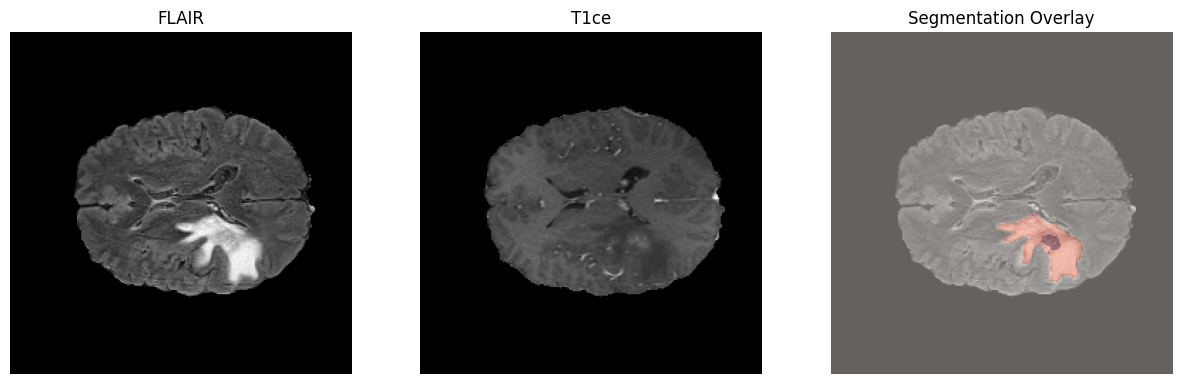

In [8]:
import matplotlib.pyplot as plt

mid_slice = images['flair'].shape[2] // 2

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(images['flair'][:, :, mid_slice], cmap='gray')
axes[0].set_title('FLAIR')

axes[1].imshow(images['t1ce'][:, :, mid_slice], cmap='gray')
axes[1].set_title('T1ce')

axes[2].imshow(images['flair'][:, :, mid_slice], cmap='gray')
axes[2].imshow(images['seg'][:, :, mid_slice], cmap='Reds', alpha=0.4)
axes[2].set_title('Segmentation Overlay')

for ax in axes:
    ax.axis('off')
plt.show()


# ****📊 Normalize Mid-Slice of FLAIR Image for Visualization or Processing****

In [9]:
import numpy as np

img_slice = images['flair'][:, :, mid_slice]
seg_slice = images['seg'][:, :, mid_slice]

img_norm = (img_slice - img_slice.min()) / (img_slice.max() - img_slice.min())


In [10]:
# Install required libraries (quietly)
!pip install -q huggingface_hub
!pip install -q git+https://github.com/bowang-lab/MedSAM2.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 90.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/21

In [11]:
ls /kaggle/input

brats20-dataset-training-validation/


# ****⚙️ Install Required Python Packages for Medical Image Processing and Deep Learning****

In [12]:
!pip install -q numpy nibabel opencv-python-headless matplotlib torch torchvision torchaudio einops tqdm


In [13]:
import numpy as np
import nibabel as nib
import cv2
import torch
import matplotlib.pyplot as plt
from einops import rearrange


# ****📂 List Contents of the MedSAM2 Directory in Working Directory****

In [24]:
!ls /kaggle/working/MedSAM2


app.py
checkpoints
data
download.sh
efficient_track_anything
eff_medsam2_infer_CT_lesion_npz_recist.py
examples
LICENSE
MedSAM2.egg-info
medsam2_infer_3D_CT.py
medsam2_infer_CT_lesion_npz_recist.py
medsam2_infer_video.py
multi_node_train.sh
notebooks
pyproject.toml
README.md
sam2
setup.py
single_node_train_eff_medsam2_FLARE25.sh
single_node_train_medsam2.sh
training


# ****🧾 Prepare File Paths for All Modalities of a Selected Patient (BraTS20_Training_001)****

In [25]:
import os

brats_base = "/kaggle/input/brats20-dataset-training-validation/MICCAI_BraTS2020_TrainingData"
patient_id = "BraTS20_Training_001"  # You can change this to another ID later

# Paths for modalities
modalities = ['flair', 't1', 't1ce', 't2', 'seg']
image_paths = {mod: os.path.join(brats_base, patient_id, f"{patient_id}_{mod}.nii.gz") for mod in modalities}

print("Paths prepared:\n", image_paths)


Paths prepared:
 {'flair': '/kaggle/input/brats20-dataset-training-validation/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii.gz', 't1': '/kaggle/input/brats20-dataset-training-validation/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii.gz', 't1ce': '/kaggle/input/brats20-dataset-training-validation/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii.gz', 't2': '/kaggle/input/brats20-dataset-training-validation/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii.gz', 'seg': '/kaggle/input/brats20-dataset-training-validation/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii.gz'}


# ****📥 Load FLAIR Modality Data for Patient BraTS20_Training_001 from Corrected Directory Path****

In [28]:
import os
import nibabel as nib

# Corrected base path
base_path = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
patient_id = "BraTS20_Training_001"

# Define full path to the patient folder
path = os.path.join(base_path, patient_id)

# Define modalities
modalities = ['flair', 't1', 't1ce', 't2', 'seg']
image_paths = {mod: os.path.join(path, f"{patient_id}_{mod}.nii") for mod in modalities}

# Load the FLAIR image
flair_img = nib.load(image_paths['flair'])
flair_data = flair_img.get_fdata()


In [29]:
import nibabel as nib

# Load the flair image
flair_img = nib.load(image_paths['flair'])
flair_data = flair_img.get_fdata()


# ****🖼️ Display Middle Slice of FLAIR Image for Patient BraTS20_Training_001****

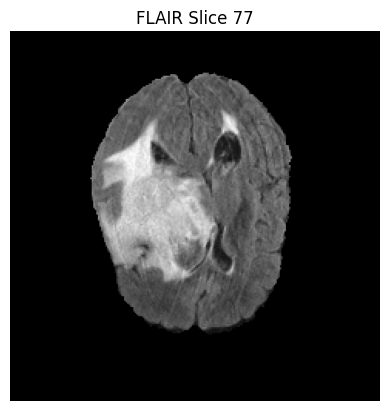

In [30]:
import matplotlib.pyplot as plt

# Choose a slice in the middle of the volume
slice_index = flair_data.shape[2] // 2
flair_slice = flair_data[:, :, slice_index]

# Display the slice
plt.imshow(flair_slice.T, cmap="gray", origin="lower")
plt.title(f"FLAIR Slice {slice_index}")
plt.axis("off")
plt.show()


In [31]:
import os
import nibabel as nib

# Set your base path
base_path = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
patient_id = "BraTS20_Training_001"

# Full path to patient's folder
path = os.path.join(base_path, patient_id)

# Modalities to load
modalities = ['flair', 't1', 't1ce', 't2', 'seg']
image_paths = {mod: os.path.join(path, f"{patient_id}_{mod}.nii") for mod in modalities}

# Load the images
images = {}
for mod in modalities:
    img = nib.load(image_paths[mod])
    images[mod] = img.get_fdata()


# ****🧩 Visualize Mid-Slice Across All Modalities (FLAIR, T1, T1CE, T2, SEG) for Selected Patient****

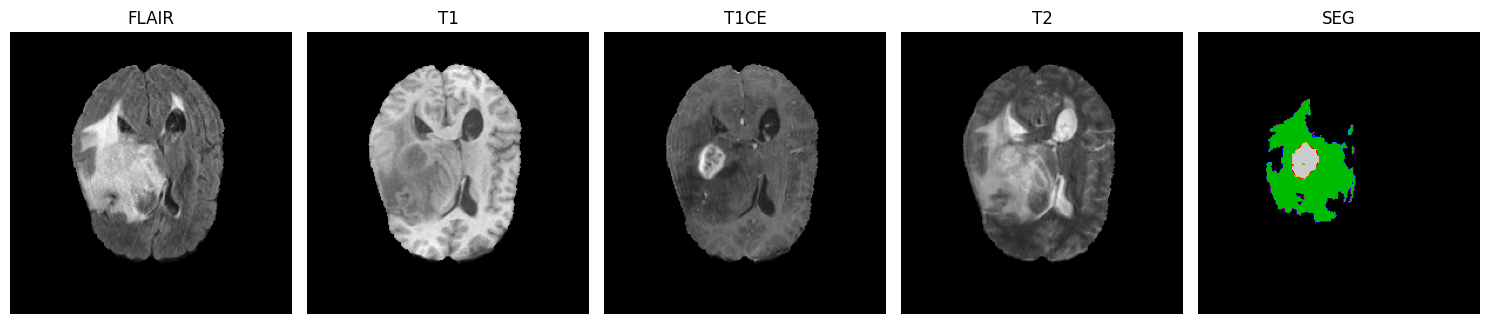

In [32]:
import matplotlib.pyplot as plt

# Choose a slice index (middle of volume)
slice_index = images['flair'].shape[2] // 2  # Typically around 77

# Plot all modalities including segmentation
plt.figure(figsize=(15, 6))
for i, mod in enumerate(modalities):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[mod][:, :, slice_index].T, cmap="gray" if mod != 'seg' else "nipy_spectral", origin="lower")
    plt.title(mod.upper())
    plt.axis("off")

plt.tight_layout()
plt.show()


# ****🔍 Overlay Segmentation Mask on FLAIR Mid-Slice for Visual Inspection****

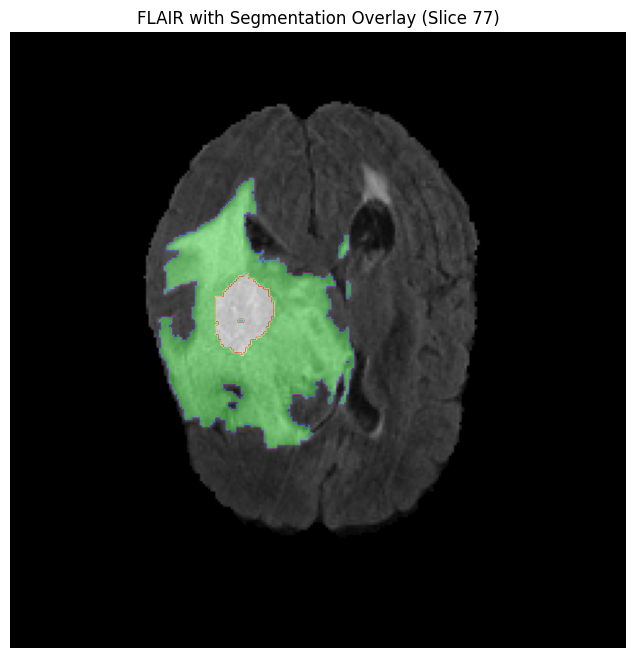

In [33]:
import matplotlib.pyplot as plt

# Use the same slice index
slice_index = images['flair'].shape[2] // 2

# Get the FLAIR and Segmentation slices
flair_slice = images['flair'][:, :, slice_index]
seg_slice = images['seg'][:, :, slice_index]

# Plot overlay
plt.figure(figsize=(8, 8))
plt.imshow(flair_slice.T, cmap="gray", origin="lower")
plt.imshow(seg_slice.T, cmap="nipy_spectral", alpha=0.4, origin="lower")  # alpha controls transparency
plt.title(f"FLAIR with Segmentation Overlay (Slice {slice_index})")
plt.axis("off")
plt.show()


# ****🖼️ Compare Mid-Slices of FLAIR, T1, T1CE, and T2 Modalities Side-by-Side****

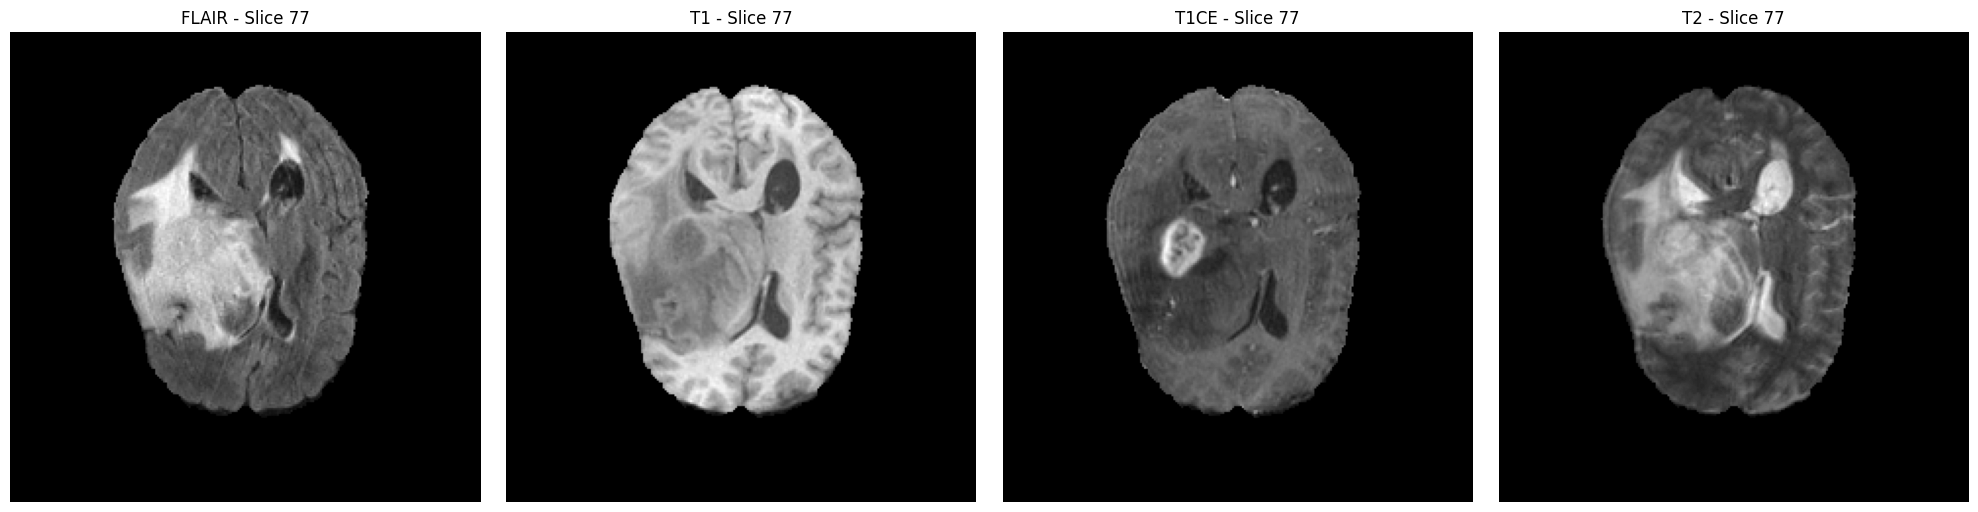

In [34]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

modalities = ['flair', 't1', 't1ce', 't2']
for i, mod in enumerate(modalities):
    axes[i].imshow(images[mod][:, :, slice_index].T, cmap="gray", origin="lower")
    axes[i].set_title(f"{mod.upper()} - Slice {slice_index}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()


# ****🧠 Visualize Individual Tumor Sub-Regions Overlaid on FLAIR Mid-Slice (Necrotic Core, Edema, Enhancing Tumor)****

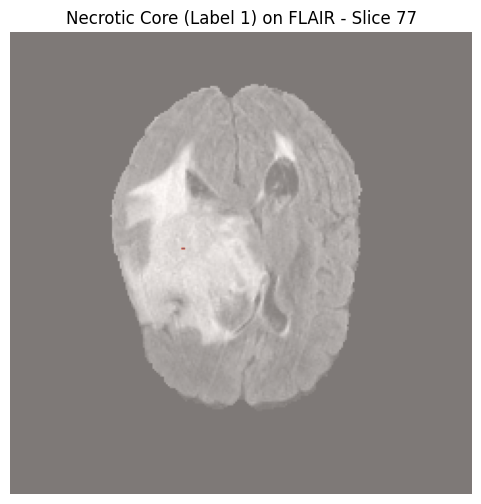

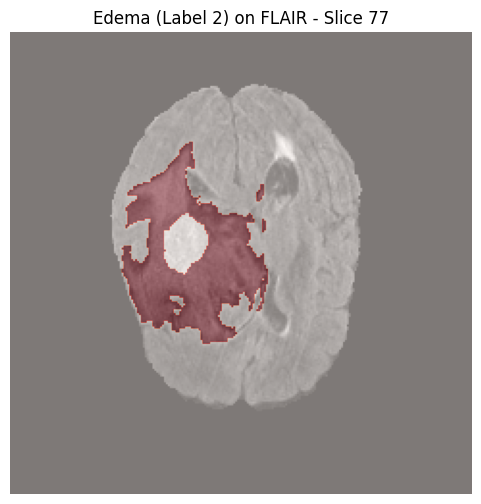

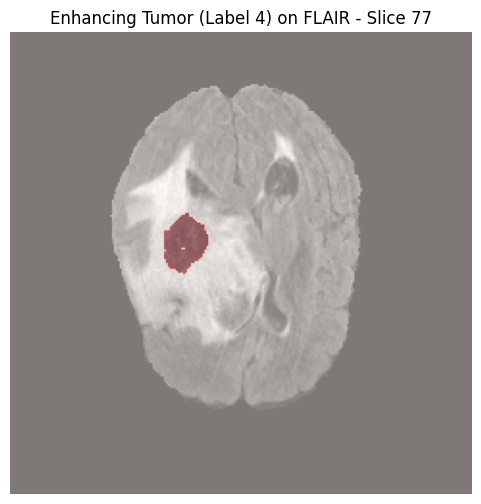

In [35]:
# Segmentation labels (from BraTS):
# 1 = Necrotic core
# 2 = Edema
# 4 = Enhancing tumor

labels = {1: 'Necrotic Core', 2: 'Edema', 4: 'Enhancing Tumor'}

for label_val, label_name in labels.items():
    mask = (images['seg'][:, :, slice_index] == label_val).astype(int)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(images['flair'][:, :, slice_index].T, cmap="gray", origin="lower")
    plt.imshow(mask.T, cmap="Reds", alpha=0.5, origin="lower")
    plt.title(f"{label_name} (Label {label_val}) on FLAIR - Slice {slice_index}")
    plt.axis("off")
    plt.show()


# ****Environment Setup****
****Please make sure to use gpu from the setting: Runtime → Change runtime type.****

In [14]:
# install dependencies and download dataset
!git clone https://github.com/bowang-lab/MedSAM2.git
%cd MedSAM2
%pip install -e .
# Download dataset
#!mkdir -p images
#folder_id = "19_fsP6zRm2nWGiPy2hEktE4rJ9SvrWsb"
#!gdown --folder https://drive.google.com/drive/folders/{folder_id} -O images
# download checkpoints
!mkdir -p checkpoints
#!gdown https://drive.google.com/uc?id=1Kw2G_giDae8JG4kasYS-MUVzzKW4gfSG -O ./checkpoints/MedSAM2_latest.pt
!wget -P checkpoints https://huggingface.co/wanglab/MedSAM2/resolve/main/MedSAM2_2411.pt
#download dataset
!wget -P data --content-disposition "https://huggingface.co/datasets/wanglab/CT_DeepLesion-MedSAM2/resolve/main/images255/000083_04_01_109-121_0000.nii.gz?download=true"
!wget -P data --content-disposition "https://huggingface.co/datasets/wanglab/CT_DeepLesion-MedSAM2/resolve/main/DeepLesion_Dataset_Info.csv?download=true"



Cloning into 'MedSAM2'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 297 (delta 61), reused 42 (delta 41), pack-reused 199 (from 1)
Receiving objects: 100% (297/297), 18.83 MiB | 45.25 MiB/s, done.
Resolving deltas: 100% (120/120), done.
/kaggle/working/MedSAM2
Obtaining file:///kaggle/working/MedSAM2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for MedSAM2 (pyproject.toml) ... done
  Created wheel for MedSAM2: filename=medsam2-1.0-0.editable-cp311-cp311-linux_x86_64.whl size=10561 sha256=a5d4fc99b41b646ab2845b4cf691a266b49162bdc07042466f31cf582d6ea682
  Stored in directory: /tmp/pip-ephem-wheel-cache-ipxehew9/wheels/aa/ed/ab/818a9d0bc6a4b727adb5eb6baa0779faf5b9a68222cb80177f
Successfully built MedSAM2

# ****Import libraries and define necessary functions****

In [17]:
# load libraries and define necessary functions
from glob import glob
from tqdm import tqdm
import os
from os.path import join, basename
import re
import matplotlib.pyplot as plt
from collections import OrderedDict
import pandas as pd
import numpy as np
import argparse

from PIL import Image
import SimpleITK as sitk
import torch
import torch.multiprocessing as mp
from sam2.build_sam import build_sam2_video_predictor_npz
import SimpleITK as sitk
from skimage import measure, morphology

torch.set_float32_matmul_precision('high')
torch.manual_seed(2024)
torch.cuda.manual_seed(2024)
np.random.seed(2024)


def getLargestCC(segmentation):
    labels = measure.label(segmentation)
    largestCC = labels == np.argmax(np.bincount(labels.flat)[1:])+1
    return largestCC

def show_mask(mask, ax, mask_color=None, alpha=0.5):
    """
    show mask on the image

    Parameters
    ----------
    mask : numpy.ndarray
        mask of the image
    ax : matplotlib.axes.Axes
        axes to plot the mask
    mask_color : numpy.ndarray
        color of the mask
    alpha : float
        transparency of the mask
    """
    if mask_color is not None:
        color = np.concatenate([mask_color, np.array([alpha])], axis=0)
    else:
        color = np.array([251/255, 252/255, 30/255, alpha])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_box(box, ax, edgecolor='blue'):
    """
    show bounding box on the image

    Parameters
    ----------
    box : numpy.ndarray
        bounding box coordinates in the original image
    ax : matplotlib.axes.Axes
        axes to plot the bounding box
    edgecolor : str
        color of the bounding box
    """
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor=edgecolor, facecolor=(0,0,0,0), lw=2))


def resize_grayscale_to_rgb_and_resize(array, image_size):
    """
    Resize a 3D grayscale NumPy array to an RGB image and then resize it.

    Parameters:
        array (np.ndarray): Input array of shape (d, h, w).
        image_size (int): Desired size for the width and height.

    Returns:
        np.ndarray: Resized array of shape (d, 3, image_size, image_size).
    """
    d, h, w = array.shape
    resized_array = np.zeros((d, 3, image_size, image_size))

    for i in range(d):
        img_pil = Image.fromarray(array[i].astype(np.uint8))
        img_rgb = img_pil.convert("RGB")
        img_resized = img_rgb.resize((image_size, image_size))
        img_array = np.array(img_resized).transpose(2, 0, 1)  # (3, image_size, image_size)
        resized_array[i] = img_array

    return resized_array


# ****Please specify the following:****

****checkpoint: model checkpoint
imgs_path: path to the 3D volume in nii.gz format
model_cfg: model config path
pred_save_dir: path to save the inference results
path_DL_info: path to the CT lesion key slices info****

In [18]:
# Set paths to the model checkpoint, image directory, and dataset information of the bounding boxes
checkpoint = './checkpoints/MedSAM2_2411.pt'
imgs_path = './data'
model_cfg = "configs/sam2.1_hiera_t512.yaml"
pred_save_dir = "../DeeLesion_results"
os.makedirs("../DeeLesion_results/", exist_ok=True)
path_DL_info = './data/DeepLesion_Dataset_Info.csv'
DL_info = pd.read_csv(path_DL_info)

In [19]:
# Nii file name used for this demo
nii_fname = sorted(os.listdir(imgs_path))[0]

seg_info = OrderedDict()
seg_info['nii_name'] = []
seg_info['key_slice_index'] = []
seg_info['DICOM_windows'] = []

# ****Run Inference****

In [20]:
# initialized predictor
predictor = build_sam2_video_predictor_npz(model_cfg, checkpoint)

# get corresponding case info
range_suffix = re.findall(r'\d{3}-\d{3}', nii_fname)[0]
slice_range = range_suffix.split('-')
slice_range = [str(int(s)) for s in slice_range]
slice_range = ', '.join(slice_range)
nii_image = sitk.ReadImage(join(imgs_path, nii_fname))
nii_image_data = sitk.GetArrayFromImage(nii_image)

case_name = re.findall(r'^(\d{6}_\d{2}_\d{2})', nii_fname)[0]
case_df = DL_info[
    DL_info['File_name'].str.contains(case_name) &
    DL_info['Slice_range'].str.contains(slice_range)
].copy()

# initialize the segmentation
segs_3D = np.zeros(nii_image_data.shape, dtype=np.uint8)

row = case_df.iloc[0]
# get the key slice info and preprocess image
lower_bound, upper_bound = row['DICOM_windows'].split(',')
lower_bound, upper_bound = float(lower_bound), float(upper_bound)
nii_image_data_pre = np.clip(nii_image_data, lower_bound, upper_bound)
nii_image_data_pre = (nii_image_data_pre - np.min(nii_image_data_pre))/(np.max(nii_image_data_pre)-np.min(nii_image_data_pre))*255.0
nii_image_data_pre = np.uint8(nii_image_data_pre)
key_slice_idx = row['Key_slice_index']
key_slice_idx = int(key_slice_idx)
slice_range = row['Slice_range']
slice_idx_start, slice_idx_end = slice_range.split(',')
slice_idx_start, slice_idx_end = int(slice_idx_start), int(slice_idx_end)
bbox_coords = row['Bounding_boxes']
bbox_coords = bbox_coords.split(',')
bbox_coords = [int(float(coord)) for coord in bbox_coords]
bbox = np.array(bbox_coords) # y_min, x_min, y_max, x_max
bbox = np.array([bbox[1], bbox[0], bbox[3], bbox[2]])

# get key slice image
key_slice_idx_offset = key_slice_idx - slice_idx_start
key_slice_img = nii_image_data_pre[key_slice_idx_offset, :,:]

img_3D_ori = nii_image_data_pre
assert np.max(img_3D_ori) < 256, f'input data should be in range [0, 255], but got {np.unique(img_3D_ori)}'

video_height = key_slice_img.shape[0]
video_width = key_slice_img.shape[1]
img_resized = resize_grayscale_to_rgb_and_resize(img_3D_ori, 512)
img_resized = img_resized / 255.0
img_resized = torch.from_numpy(img_resized).cuda()
img_mean=(0.485, 0.456, 0.406)
img_std=(0.229, 0.224, 0.225)
img_mean = torch.tensor(img_mean, dtype=torch.float32)[:, None, None].cuda()
img_std = torch.tensor(img_std, dtype=torch.float32)[:, None, None].cuda()
img_resized -= img_mean
img_resized /= img_std
z_mids = []

with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    inference_state = predictor.init_state(img_resized, video_height, video_width)

    _, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
                                        inference_state=inference_state,
                                        frame_idx=key_slice_idx_offset,
                                        obj_id=1,
                                        box=bbox,
                                        )


    for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
        segs_3D[out_frame_idx, (out_mask_logits[0] > 0.0).cpu().numpy()[0]] = 1
    predictor.reset_state(inference_state)

    _, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
                                        inference_state=inference_state,
                                        frame_idx=key_slice_idx_offset,
                                        obj_id=1,
                                        box=bbox,
                                    )


    for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state, reverse=True):
        segs_3D[out_frame_idx, (out_mask_logits[0] > 0.0).cpu().numpy()[0]] = 1
    predictor.reset_state(inference_state)
if np.max(segs_3D) > 0:
    segs_3D = getLargestCC(segs_3D)
    segs_3D = np.uint8(segs_3D)
sitk_image = sitk.GetImageFromArray(img_3D_ori)
sitk_image.CopyInformation(nii_image)
sitk_mask = sitk.GetImageFromArray(segs_3D)
sitk_mask.CopyInformation(nii_image)
# save single lesion
key_slice_idx = row['Key_slice_index']
save_seg_name = nii_fname.split('.nii.gz')[0] + f'_k{key_slice_idx}_mask.nii.gz'
sitk.WriteImage(sitk_image, os.path.join(pred_save_dir, nii_fname.replace('.nii.gz', '_img.nii.gz')))
sitk.WriteImage(sitk_mask, os.path.join(pred_save_dir, save_seg_name))
seg_info['nii_name'].append(save_seg_name)
seg_info['key_slice_index'].append(key_slice_idx)
seg_info['DICOM_windows'].append(row['DICOM_windows'])


/kaggle/working/MedSAM2/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()
/kaggle/working/MedSAM2/sam2/sam2_video_predictor_npz.py:965: UserWarning: /kaggle/working/MedSAM2/sam2/_C.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE

Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't affect the results in most cases; see https://github.com/facebookresearch/sam2/blob/main/INSTALL.md).
  pred_masks_gpu = fill_holes_in_mask_scores(
propagate in video: 100%|██████████| 7/7 [00:00<00:00, 20.68it/s]


In [21]:
# save the segmentation info to a csv file
seg_info_df = pd.DataFrame(seg_info)
seg_info_df.to_csv(join(pred_save_dir, 'tiny_seg_info202412.csv'), index=False)

# ****Optional: Realization of the segmentation****# 
****In the following, we show the image and the overlayed segmentation slices of 25 percentile, key slice, and 75 percentile****

/tmp/ipykernel_36/248211859.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


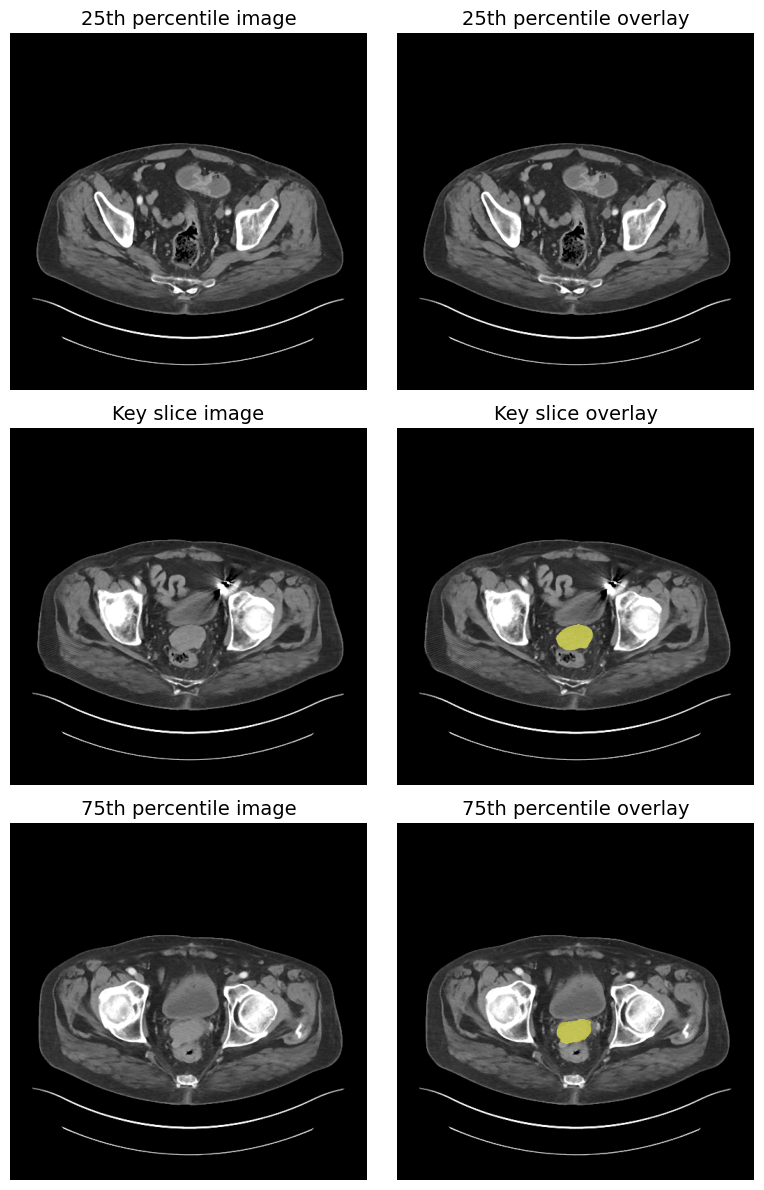

In [22]:
slice_indices = np.arange(0, slice_idx_end - slice_idx_start)
slice_idx_25 = int(np.percentile(slice_indices, 25))
slice_idx_75 = int(np.percentile(slice_indices, 75))
percentile_slices = [slice_idx_25, key_slice_idx_offset, slice_idx_75]

fig, axes = plt.subplots(3, 2, figsize=(8, 12), constrained_layout=True)
for ax in axes.flatten():
    ax.axis('off')

row_titles = ['25th percentile image', 'Key slice image', '75th percentile image']
row_titles_masks = ['25th percentile overlay', 'Key slice overlay', '75th percentile overlay']

for row_idx, slice_idx in enumerate(percentile_slices):
    imgs_2D = img_3D_ori[slice_idx].T
    imgs_2D = imgs_2D[:, :, None].repeat(3, axis=-1)
    segs_2D = segs_3D[slice_idx].T

    axes[row_idx, 0].imshow(imgs_2D, cmap='gray')
    axes[row_idx, 1].imshow(imgs_2D, cmap='gray')
    show_mask(segs_2D, ax=axes[row_idx, 1])

    axes[row_idx, 0].set_title(row_titles[row_idx], fontsize=14)
    axes[row_idx, 1].set_title(row_titles_masks[row_idx], fontsize=14)

plt.tight_layout()